# World Happiness Analysis

The goal of this project is to analyse world happiness between 2016 and 2019

This project will involve ingesting data from different data sources which will then be cleaned and transformed into one consolidated masterfile. The masterfile will then be loaded into a visualisation tool for further analysis

The datasets were obtained from [Euromonitor](https://www.euromonitor.com/), [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD), [Kaggle](https://www.kaggle.com/unsdsn/world-happiness), [Metaweather Open API](https://www.metaweather.com/api/) and [Git Hub](https://raw.githubusercontent.com/icyrockcom/country-capitals/master/data/country-list.csv)

## <font color='light blue'>Part 1 - Extract and Transform datasets</font>

### 1a. `life_death_statistics.csv`

In [1]:
from pathlib import Path
import pandas as pd

# Load Dataset
def loadData(file_path):
    return pd.read_csv(Path(file_path))

data = loadData('../../Data/Raw/life_death_statistics.csv')

#### Create functions to transform datasets

In [2]:
# Switch columns to rows
def colsToRows(table, cols_keep, cols_switch, col_name):
    return pd.melt(table, id_vars = cols_keep, value_vars = cols_switch, var_name = col_name)

# Switch rows to columns
def rowsToCols(table, cols_keep, new_col, new_values):
    return pd.pivot(table, index = cols_keep, columns = new_col, values = new_values).reset_index()

#### Transform dataset

In [3]:
# Switch 'Year' columns to rows
df = colsToRows(data, ['Geography', 'Category'], ['2016', '2017', '2018', '2019'], 'Year')

# Switch 'Category' rows to columns
df_pivoted = rowsToCols(df, ['Geography', 'Year'], 'Category', 'value')
df_pivoted = df_pivoted.rename(columns={'Geography': 'Country'})

# The following returns the index then switches the output back into a list
# cols.name=None -- alternative option
cols = df_pivoted.columns.to_list()

df_pivoted.columns = cols
df_pivoted

,Country,Year,Death Rates,Deaths,Deaths from Mental and Behavioural Disorders,Healthy Life Expectancy at Birth,Infant Deaths,Infant Mortality Rates,Inflation,Life Expectancy at Birth,Real GDP Growth,Survival to Age 65,Total Population
0,Afghanistan,2016,6.7,237.7,NaN,54.0,65276.0,56.9,4.384,63.8,2.164,63.3,35383.0
1,Afghanistan,2017,6.6,238.1,NaN,54.3,62228.0,54.0,4.976,64.1,2.665,63.8,36296.1
2,Afghanistan,2018,6.4,238.7,NaN,54.7,59564.0,51.5,0.626,64.5,2.700,64.3,37171.9
3,Afghanistan,2019,6.3,239.4,NaN,55.0,57338.0,49.4,2.302,64.8,3.037,64.9,38041.8
4,Albania,2016,7.5,21.8,2.2,70.0,459.0,13.3,1.282,78.5,3.315,87.7,2886.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Zambia,2019,6.3,113.6,NaN,55.7,29990.0,44.3,9.800,63.9,1.520,61.2,17861.0
832,Zimbabwe,2016,8.3,116.4,NaN,53.4,22695.0,42.3,-1.558,60.3,0.756,52.2,14030.3
833,Zimbabwe,2017,8.0,114.8,NaN,53.8,22203.0,41.5,0.907,60.8,4.704,52.8,14236.6
834,Zimbabwe,2018,7.9,114.2,NaN,54.2,21759.0,40.8,10.607,61.2,3.497,53.2,14438.8


### 1b. Load `household_statistics.csv`

In [4]:
# Load Dataset
data = loadData('../../Data/Raw/household_statistics.csv')

# Transform Dataset
# Switch 'Year' columns to rows
df2 = colsToRows(data, ['Geography', 'Category'], ['2016', '2017', '2018', '2019'], 'Year')

# Switch 'Category' rows to columns
df2_pivoted = rowsToCols(df2, ['Geography', 'Year'], 'Category', 'value')
df2_pivoted = df2_pivoted.rename(columns={'Geography': 'Country'})

# The following returns the index then switches the output back into a list
# cols.name=None -- alternative option
cols = df2_pivoted.columns.to_list()

df2_pivoted.columns = cols
df2_pivoted

,Country,Year,Average Household Size,Average Number of Children per Household,Number of Households
0,Afghanistan,2016,5.2,2.7,6846.4
1,Afghanistan,2017,5.1,2.6,7053.2
2,Afghanistan,2018,5.1,2.6,7254.2
3,Afghanistan,2019,5.1,2.5,7455.3
4,Albania,2016,3.9,0.9,731.3
...,...,...,...,...,...
831,Zambia,2019,5.2,2.7,3420.0
832,Zimbabwe,2016,4.2,2.1,3337.0
833,Zimbabwe,2017,4.2,2.1,3396.5
834,Zimbabwe,2018,4.2,2.1,3456.4


### 1c. Load `iso.csv`

In [5]:
df3 = loadData('../../Data/Raw/iso.csv')
df3

,ISO,Country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands
...,...,...
241,WSM,Samoa
242,YEM,Yemen
243,ZAF,South Africa
244,ZMB,Zambia


### 1d. Load `gdp_incomegroup.csv`

In [6]:
df4 = loadData('../../Data/Raw/gdp_incomegroup.csv').drop(columns='TableName')
df4

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income
...,...,...,...
212,XKX,Europe & Central Asia,Upper middle income
213,YEM,Middle East & North Africa,Low income
214,ZAF,Sub-Saharan Africa,Upper middle income
215,ZMB,Sub-Saharan Africa,Lower middle income


### 1e. Load `gni_per_capita.csv`

In [7]:
data = loadData('../../Data/Raw/gni_per_capita.csv').drop(columns='Indicator Code')

# Extracting year range and converting to string variable
# Note only data from 2016-2019 is included
def getYearList(start_year, end_year):
    return [str(year) for year in list(range(start_year, end_year))]

# Transform Dataset
# Switch 'Year' columns to rows             
df5 = colsToRows(data, ['Country Name', 'Country Code', 'Indicator Name'], getYearList(2016, 2020), 'Year')

# Switch 'Indicator Name' rows to columns
df5_pivoted = rowsToCols(df5, ['Country Name', 'Country Code', 'Year'], 'Indicator Name', 'value')
df5_pivoted = df5_pivoted.rename(columns=
                                 {'GNI per capita, PPP (current international $)': 
                                  'GNI per capita ($)', 'Country Name':'Country'})

# The following returns the index then switches the output back into a list
# cols.name=None -- alternative option
cols = df5_pivoted.columns.to_list()

df5_pivoted.columns = cols
df5_pivoted

,Country,Country Code,Year,GNI per capita ($)
0,Afghanistan,AFG,2016,2150.0
1,Afghanistan,AFG,2017,2230.0
2,Afghanistan,AFG,2018,2260.0
3,Afghanistan,AFG,2019,2330.0
4,Albania,ALB,2016,12200.0
...,...,...,...,...
959,Zambia,ZMB,2019,3580.0
960,Zimbabwe,ZWE,2016,2560.0
961,Zimbabwe,ZWE,2017,2760.0
962,Zimbabwe,ZWE,2018,2990.0


### 1f. Load `gdp` table from `data.db`

In [8]:
import sqlite3

# Create SQL connection to database
con = sqlite3.connect('../../Data/Raw/data.db')

# Extract GDP table
data = pd.read_sql_query('SELECT * FROM gdp', con).drop(columns='Indicator Code')

# Transform Dataset
# Switch 'Year' columns to rows             
df6 = colsToRows(data, ['Country Name', 'Country Code', 'Indicator Name'], getYearList(2016, 2020), 'Year')

# Switch 'Indicator Name' rows to columns
df6_pivoted = rowsToCols(df6, ['Country Name', 'Country Code', 'Year'], 'Indicator Name', 'value')
df6_pivoted = df6_pivoted.rename(columns=
                                 {'GDP (current US$)': 
                                  'GDP ($)', 'Country Name':'Country'})

# The following returns the index then switches the output back into a list
# cols.name=None -- alternative option
cols = df6_pivoted.columns.to_list()

df6_pivoted.columns = cols
df6_pivoted  

,Country,Country Code,Year,GDP ($)
0,Afghanistan,AFG,2016,1.936264e+10
1,Afghanistan,AFG,2017,2.019176e+10
2,Afghanistan,AFG,2018,1.948438e+10
3,Afghanistan,AFG,2019,1.910135e+10
4,Albania,ALB,2016,1.186120e+10
...,...,...,...,...
1003,Zambia,ZMB,2019,2.306472e+10
1004,Zimbabwe,ZWE,2016,2.054868e+10
1005,Zimbabwe,ZWE,2017,2.204090e+10
1006,Zimbabwe,ZWE,2018,2.431156e+10


### 1g. Load `world_happiness_all.csv`

In [9]:
# Load and convert txt file to csv file
txt_file = pd.read_csv(Path('../../Data/Raw/world_happiness_all.txt'), sep=';')
txt_file.to_csv(Path('../../Data/Raw/world_happiness_all.csv'), index=None)

# Load csv file and convert Year from integer to string (object type) to match rest of Year columns
data = pd.read_csv('../../Data/Raw/world_happiness_all.csv')
df7 = data.astype({'Year': str})

# Update Country names
new_country_names = {'North Cyprus':'Cyprus', 'Northern Cyprus':'Cyprus', 'Hong Kong': 'Hong Kong, China', 
                     'Somaliland region':'Somalia', 'Macedonia':'North Macedonia', 'Palestinian Territories':'Palestine', 
                     'Congo (Kinshasa)':'Congo', 'Congo (Brazzaville)':'Congo, the Democratic Republic of the', 
                     'Ivory Coast':'Ivory Coast', 'Somaliland Region':'Somalia', 'United States':'USA', 
                     'Taiwan Province of China':'Taiwan', 'Hong Kong S.A.R., China':'Hong Kong, China', 
                     'Trinidad & Tobago':'Trinidad and Tobago'}

df7 = df7.replace({'Country': new_country_names})

# Extract required columns only
df7 = df7.iloc[:,:5].drop(columns='Region')
df7

,Country,Year,Happiness Score,Happiness Rank
0,Afghanistan,2015,3.575,153
1,Afghanistan,2016,3.360,154
2,Afghanistan,2017,3.794,141
3,Afghanistan,2018,3.632,145
4,Afghanistan,2019,3.203,154
...,...,...,...,...
777,Zimbabwe,2015,4.610,115
778,Zimbabwe,2016,4.193,131
779,Zimbabwe,2017,3.875,138
780,Zimbabwe,2018,3.692,144


### 1h. Load `country` and `capital` columns from 
`https://raw.githubusercontent.com/icyrockcom/country-capitals/master/data/country-list.csv`

In [10]:
# Load data from URL
url = 'https://raw.githubusercontent.com/icyrockcom/country-capitals/master/data/country-list.csv'
data = pd.read_csv(url).drop(columns='type')

df8 = data.rename(columns={'country':'Country', 'capital': 'Capital'})
df8

,Country,Capital
0,Abkhazia,Sukhumi
1,Afghanistan,Kabul
2,Akrotiri and Dhekelia,Episkopi Cantonment
3,Albania,Tirana
4,Algeria,Algiers
...,...,...
243,Wallis and Futuna,Mata-Utu
244,Western Sahara,El Aaiún
245,Yemen,Sanaá
246,Zambia,Lusaka


### 1i. Create a masterfile by consolidating all eight datasets above

In [11]:
# Define a function to carry out INNER JOIN
def innerJoinTables(left_table, right_table, join_variable):
    return pd.merge(left_table, right_table, on=join_variable, how='inner')

In [12]:
# Start with the largest dataset - GDP and work in descending order of size
merged_df = innerJoinTables(df6_pivoted, df5_pivoted, ['Country', 'Country Code', 'Year']) # GNI
merged_df = innerJoinTables(merged_df, df_pivoted, ['Country', 'Year']) # life/death stats
merged_df = innerJoinTables(merged_df, df2_pivoted, ['Country', 'Year']) # household stats
merged_df = innerJoinTables(merged_df, df7, ['Country', 'Year']) # world happiness
merged_df = innerJoinTables(merged_df, df8, 'Country') # country capital
merged_df = innerJoinTables(merged_df, df3, 'Country') # country ISO
merged_df = innerJoinTables(merged_df, df4, 'Country Code') # GDP

# Clean up merged data frame. Remove duplicate column
merged_df = merged_df.drop(columns='ISO')

# Reorder columns to match target
merged_df = merged_df[['Country', 'Country Code', 'Capital','Region', 'IncomeGroup', 'Year', 
       'Death Rates', 'Deaths', 'Deaths from Mental and Behavioural Disorders',
       'Healthy Life Expectancy at Birth', 'Infant Deaths',
       'Infant Mortality Rates', 'Inflation', 'Life Expectancy at Birth',
       'Real GDP Growth', 'Survival to Age 65', 'Total Population',
       'Average Household Size', 'Average Number of Children per Household',
       'Number of Households', 'GDP ($)', 'GNI per capita ($)', 'Happiness Score', 'Happiness Rank']]

merged_df

,Country,Country Code,Capital,Region,IncomeGroup,Year,Death Rates,Deaths,Deaths from Mental and Behavioural Disorders,Healthy Life Expectancy at Birth,...,Real GDP Growth,Survival to Age 65,Total Population,Average Household Size,Average Number of Children per Household,Number of Households,GDP ($),GNI per capita ($),Happiness Score,Happiness Rank
0,Afghanistan,AFG,Kabul,South Asia,Low income,2016,6.7,237.7,NaN,54.0,...,2.164,63.3,35383.0,5.2,2.7,6846.4,1.936264e+10,2150.0,3.360,154
1,Afghanistan,AFG,Kabul,South Asia,Low income,2017,6.6,238.1,NaN,54.3,...,2.665,63.8,36296.1,5.1,2.6,7053.2,2.019176e+10,2230.0,3.794,141
2,Afghanistan,AFG,Kabul,South Asia,Low income,2018,6.4,238.7,NaN,54.7,...,2.700,64.3,37171.9,5.1,2.6,7254.2,1.948438e+10,2260.0,3.632,145
3,Afghanistan,AFG,Kabul,South Asia,Low income,2019,6.3,239.4,NaN,55.0,...,3.037,64.9,38041.8,5.1,2.5,7455.3,1.910135e+10,2330.0,3.203,154
4,Albania,ALB,Tirana,Europe & Central Asia,Upper middle income,2016,7.5,21.8,2.2,70.0,...,3.315,87.7,2886.4,3.9,0.9,731.3,1.186120e+10,12200.0,4.655,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Zambia,ZMB,Lusaka,Sub-Saharan Africa,Lower middle income,2019,6.3,113.6,NaN,55.7,...,1.520,61.2,17861.0,5.2,2.7,3420.0,2.306472e+10,3580.0,4.107,138
519,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2016,8.3,116.4,NaN,53.4,...,0.756,52.2,14030.3,4.2,2.1,3337.0,2.054868e+10,2560.0,4.193,131
520,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2017,8.0,114.8,NaN,53.8,...,4.704,52.8,14236.6,4.2,2.1,3396.5,2.204090e+10,2760.0,3.875,138
521,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2018,7.9,114.2,NaN,54.2,...,3.497,53.2,14438.8,4.2,2.1,3456.4,2.431156e+10,2990.0,3.692,144


### 1j. Enrich data with data from an API
Using [Metaweather Open API](https://www.metaweather.com/api/)

- Pull/get the weather details of the country's `capital` city on the last day of the `Year`
- Determine the (1) maximum observed `max_temp`, (2) average `humidity`, and (3) modal `weather_state_name` that was recorded on the last day of that year. 

#### Retrieve Where On Earth ID for each capital city

In [13]:
import json
import requests

# Search woeid by location to grab IDs
core_url = 'https://www.metaweather.com/api/location/search/?query='
capital_list = pd.unique(merged_df['Capital']) # create list of capital cities
count = len(capital_list)

while count > 0:
    capital = []
    woeid = []
    
    for city in capital_list:
        r = requests.get(url = core_url + capital_list[count - 1]) # get data from API
        data = r.json() # parse response in JSON format
        
        capital.append(city)
        
        if len(data) == 0:
            woeid.append(None) # this is because some cities return no response (i.e. no WOEID)
        else:
            loc_id = data[0]['woeid']
            woeid.append(loc_id)
        
        count -= 1

capital_woeid = dict(zip(capital, woeid))

# A dataframe showing results from search by location 
data = capital_woeid
API_result = pd.DataFrame.from_dict(data, orient='index', columns=['WOEID']).reset_index()
API_result = API_result.rename(columns={'index':'Capital'})
API_result

,Capital,WOEID
0,Kabul,NaN
1,Tirana,NaN
2,Algiers,NaN
3,Luanda,NaN
4,Buenos Aires,NaN
...,...,...
128,Montevideo,468739.0
129,Tashkent,NaN
130,Hanoi,NaN
131,Lusaka,NaN


#### Retrieve the weather details for each capital city from 2016 to 2019 and store in a dictionary

In [14]:
# Get max_temp, humidity and weather_state_name for each capital on the last day of each year using woeid
# Date format for API in yyyy/mm/dd -- YEAR/12/31

woeid = API_result['WOEID'].dropna().astype(int)

core_url = 'https://www.metaweather.com/api/location/'
year_list = list(range(2016, 2020))

key = []
value = []

# Get weather detail for each year available in main datadrame
for year in year_list:
    capital_id = []
    max_temp = []
    humidity = []
    weather_state_name = []

    # Get weather details for each location
    for loc_id in woeid:
        url = core_url + '{}/'.format(str(loc_id)) + '{}/'.format(str(year)) + '12/31/'
        r = requests.get(url = url) # get data from API
        data = r.json() # parse response in JSON format
            
        capital_id.append(loc_id)
        max_temp.append(data[0]['max_temp'])
        humidity.append(data[0]['humidity'])
        weather_state_name.append(data[0]['weather_state_name'])
            
    # Create dictionary for the year
    year_dict = {'WOEID': capital_id, 'Max Temp': max_temp, 
                 'Humidity': humidity, 'Weather State': weather_state_name}
    
    key.append(year)    
    value.append(year_dict)
        
    print('{} complete'.format(year))
    
yearly_capital_weather = dict(zip(key, value))

2016 complete
2017 complete
2018 complete
2019 complete


#### Extract yearly data from `year_capital_weather` dictionary and create one weather dataframe

In [15]:
def createDataframeFromDict(dictionary, year):
    temp = pd.DataFrame(dictionary[year])
    temp['Year'] = str(year)
    
    return temp

In [16]:
year_df = []

for year in getYearList(2016, 2020):
    temp = createDataframeFromDict(yearly_capital_weather, int(year))
    year_df.append(temp)

full_weather_df = year_df[0].append(year_df[1::])
full_weather_df

,WOEID,Max Temp,Humidity,Weather State,Year
0,924938,1.088000,83,Heavy Cloud,2016
1,2343732,-0.938000,93,Sleet,2016
2,1225448,30.231429,55,Heavy Cloud,2016
3,906057,9.894000,82,Showers,2016
4,766273,6.610000,70,Light Cloud,2016
...,...,...,...,...,...
41,968019,5.035000,86,Heavy Cloud,2019
42,834463,3.165000,88,Hail,2019
43,1915035,22.560000,56,Light Cloud,2019
44,551801,5.480000,58,Light Cloud,2019


### 1k. Merge API data into masterfile

#### Merge main dataframe with `full_weather_df`  to create a complete dataframe

In [17]:
# First merge main dataframe with weoid dataframe to add join variable in main
merged_df_new = pd.merge(merged_df, API_result, on='Capital', how='left') # left join to keep everything from main df

# Then merge main dataframe with weather dataframe
temp_merge = pd.merge(merged_df_new, full_weather_df, left_on=['WOEID', 'Year'], right_on=['WOEID', 'Year'], how='left')

# Clean up
temp_merge = temp_merge.T.drop_duplicates().T
complete_df = temp_merge.drop(columns=['WOEID'])

complete_df

,Country,Country Code,Capital,Region,IncomeGroup,Year,Death Rates,Deaths,Deaths from Mental and Behavioural Disorders,Healthy Life Expectancy at Birth,...,Average Household Size,Average Number of Children per Household,Number of Households,GDP ($),GNI per capita ($),Happiness Score,Happiness Rank,Max Temp,Humidity,Weather State
0,Afghanistan,AFG,Kabul,South Asia,Low income,2016,6.7,237.7,NaN,54.0,...,5.2,2.7,6846.4,19362642267.0,2150.0,3.36,154,NaN,NaN,NaN
1,Afghanistan,AFG,Kabul,South Asia,Low income,2017,6.6,238.1,NaN,54.3,...,5.1,2.6,7053.2,20191760000.0,2230.0,3.794,141,NaN,NaN,NaN
2,Afghanistan,AFG,Kabul,South Asia,Low income,2018,6.4,238.7,NaN,54.7,...,5.1,2.6,7254.2,19484384937.0,2260.0,3.632,145,NaN,NaN,NaN
3,Afghanistan,AFG,Kabul,South Asia,Low income,2019,6.3,239.4,NaN,55.0,...,5.1,2.5,7455.3,19101353833.0,2330.0,3.203,154,NaN,NaN,NaN
4,Albania,ALB,Tirana,Europe & Central Asia,Upper middle income,2016,7.5,21.8,2.2,70.0,...,3.9,0.9,731.3,11861200797.0,12200.0,4.655,109,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Zambia,ZMB,Lusaka,Sub-Saharan Africa,Lower middle income,2019,6.3,113.6,NaN,55.7,...,5.2,2.7,3420.0,23064722446.0,3580.0,4.107,138,NaN,NaN,NaN
519,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2016,8.3,116.4,NaN,53.4,...,4.2,2.1,3337.0,20548678100.0,2560.0,4.193,131,NaN,NaN,NaN
520,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2017,8.0,114.8,NaN,53.8,...,4.2,2.1,3396.5,22040902300.0,2760.0,3.875,138,NaN,NaN,NaN
521,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2018,7.9,114.2,NaN,54.2,...,4.2,2.1,3456.4,24311560500.0,2990.0,3.692,144,NaN,NaN,NaN


## <font color='light blue'>Part 2 - Data Cleaning</font>

### Check Data Type, Data Quality and Data Statistics
For future computations, make sure the expected data type matches the actual column data type

|Column Name|Data Type|Description|
 |------|----|----|
 |Country Name| String|Name of the country|
 |Country Code| String|ISO code of the country|
 |Capital| String |Capital city of the country|
 |Region| String |Region where the country belongs to|
 |IncomeGroup| String |Income classification of the country|
 |Year| Integer |Given year|
 |Death Rates  | Float | Number of Death wrt to number of births |
 |Deaths from Mental and Behavioural Disorders  | Float | Number of deaths attributable to a mental causes per 100,000 population in a given year|
 |Healthy Life Expectancy at Birth| Float |Indicates the number of years a newborn infant would live healthy if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life|
 |Infant Deaths| Integer |Number of infant deaths in a given year|
 |Infant Mortality Rates  | Float | Number of infant death wrt to number of births |
 |Inflation  | Float | Increase/decrease in purchasing power of the country's currency |
 |Life Expectancy at Birth| Float |Indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life|
 |Real GDP Growth | Float |Measure of a country's gross domestic product that has been adjusted for inflation|
 |Survival to Age 65  | Float | Percentage of a cohort of newborn infants that would survive to age 65| 
 |Total Population| Float |Population is based on the de Jure definition of population. The de jure population is a concept under which individuals  are recorded to a geographical area on the basis of the place of residence. (per 100,000)  |
 |Average Household Size| Float |Refers to average number of people per household. |
 |Average Number of Children per Household| Float |Refers to average number of children per household. |
 |Number of Households| Float |Total number of households (in 100,000) |
 |GNI per capita |Float | The dollar value of a country's final income in a year, divided by its population|
 |GDP|Float |Sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products ($)|
 |Happiness Score| Float |Based on Gallup World Poll Survey  |
 |Happiness Rank| Integer |Rank of country based on happiness score  |
 |Max Temperature | Float |Maximum Temperature recorded for the day in the whole country|
 |Average Humidity | Float |Average humidity recorded for the day in the whole country|
 |Weather State | String | Prevailing weather for the day in the whole country|


### 2a. Check column data types

In [18]:
complete_df.dtypes

Country                                         object
Country Code                                    object
Capital                                         object
Region                                          object
IncomeGroup                                     object
Year                                            object
Death Rates                                     object
Deaths                                          object
Deaths from Mental and Behavioural Disorders    object
Healthy Life Expectancy at Birth                object
Infant Deaths                                   object
Infant Mortality Rates                          object
Inflation                                       object
Life Expectancy at Birth                        object
Real GDP Growth                                 object
Survival to Age 65                              object
Total Population                                object
Average Household Size                          object
Average Nu

In [19]:
# Update data types columns accordingly
types = {'Year':'int','Death Rates':'float', 'Deaths':'float', 'Deaths from Mental and Behavioural Disorders':'float',
       'Healthy Life Expectancy at Birth':'float', 'Infant Deaths':'int',
       'Infant Mortality Rates':'float', 'Inflation':'float', 'Life Expectancy at Birth':'float',
       'Real GDP Growth':'float', 'Survival to Age 65':'float', 'Total Population':'float',
       'Average Household Size':'float', 'Average Number of Children per Household':'float',
       'Number of Households':'float', 'GDP ($)':'float', 'GNI per capita ($)':'float',
       'Happiness Score':'float', 'Happiness Rank':'int', 'Max Temp':'float', 'Humidity':'float'}

complete_df = complete_df.astype(types)

### 2b. Fill missing values by the mean/mode value of the `Region` the country belongs to
#### Check which columns have null values

In [20]:
complete_df.isnull().sum()

Country                                           0
Country Code                                      0
Capital                                           0
Region                                            0
IncomeGroup                                       0
Year                                              0
Death Rates                                       0
Deaths                                            0
Deaths from Mental and Behavioural Disorders    158
Healthy Life Expectancy at Birth                  1
Infant Deaths                                     0
Infant Mortality Rates                            0
Inflation                                         0
Life Expectancy at Birth                          0
Real GDP Growth                                   0
Survival to Age 65                                0
Total Population                                  0
Average Household Size                            0
Average Number of Children per Household          0
Number of Ho

### 2c. Update null values using _mean_ for each region where columns are numerical

#### Calculate mean by region for all columns in question

In [21]:
region_mean = complete_df.groupby('Region').agg(mean_deaths = ('Deaths from Mental and Behavioural Disorders', 'mean'),
                                 mean_life_exp = ('Healthy Life Expectancy at Birth', 'mean'),
                                 mean_GDP = ('GDP ($)', 'mean'), mean_GNI = ('GNI per capita ($)', 'mean'),
                                 mean_temp = ('Max Temp', 'mean'),
                                                mean_humidity = ('Humidity', 'mean')).round(2).reset_index().copy()

region_mean

,Region,mean_deaths,mean_life_exp,mean_GDP,mean_GNI,mean_temp,mean_humidity
0,East Asia & Pacific,12.14,67.30,1.715554e+12,25041.92,10.66,80.75
1,Europe & Central Asia,25.11,69.49,4.088142e+11,34792.51,14.72,75.32
2,Latin America & Caribbean,6.21,66.08,2.298448e+11,13866.07,11.52,73.36
3,Middle East & North Africa,7.50,67.06,1.784102e+11,32896.36,20.59,68.31
4,North America,61.82,72.55,1.660000e+12,48555.00,NaN,NaN
5,South Asia,1.55,60.88,4.921719e+11,6137.78,6.91,86.50
6,Sub-Saharan Africa,8.11,55.06,4.625539e+10,4814.51,12.07,66.10


#### Create iterable lists for region and attribute

In [22]:
region_cols = list(region_mean.columns)
region_cols.remove('Region')

attr_cols = ['Deaths from Mental and Behavioural Disorders', 'Healthy Life Expectancy at Birth', 'GDP ($)',
           'GNI per capita ($)', 'Max Temp', 'Humidity']

#### Create functions to carry out update 

In [23]:
def createRegionDict(df, col):
    temp = df[['Region', col]].to_dict('split')
    return dict(temp['data'])

def updateNull(df, dictionary, col):
    for k, v in dictionary.items():
        df.loc[(df['Region'] == k) & df[col].isnull(), col] = v # brackets within condition works similar to BODMAS?
    return df

#### Update all null numerical values for `complete_df` across all six columns

In [24]:
counter = len(attr_cols)
index = 0

while counter > 0:
    mean_dict = createRegionDict(region_mean, region_cols[index])
    updateNull(complete_df, mean_dict, attr_cols[index])
    
    index += 1
    counter -= 1

complete_df

,Country,Country Code,Capital,Region,IncomeGroup,Year,Death Rates,Deaths,Deaths from Mental and Behavioural Disorders,Healthy Life Expectancy at Birth,...,Average Household Size,Average Number of Children per Household,Number of Households,GDP ($),GNI per capita ($),Happiness Score,Happiness Rank,Max Temp,Humidity,Weather State
0,Afghanistan,AFG,Kabul,South Asia,Low income,2016,6.7,237.7,1.55,54.0,...,5.2,2.7,6846.4,1.936264e+10,2150.0,3.360,154,6.91,86.50,NaN
1,Afghanistan,AFG,Kabul,South Asia,Low income,2017,6.6,238.1,1.55,54.3,...,5.1,2.6,7053.2,2.019176e+10,2230.0,3.794,141,6.91,86.50,NaN
2,Afghanistan,AFG,Kabul,South Asia,Low income,2018,6.4,238.7,1.55,54.7,...,5.1,2.6,7254.2,1.948438e+10,2260.0,3.632,145,6.91,86.50,NaN
3,Afghanistan,AFG,Kabul,South Asia,Low income,2019,6.3,239.4,1.55,55.0,...,5.1,2.5,7455.3,1.910135e+10,2330.0,3.203,154,6.91,86.50,NaN
4,Albania,ALB,Tirana,Europe & Central Asia,Upper middle income,2016,7.5,21.8,2.20,70.0,...,3.9,0.9,731.3,1.186120e+10,12200.0,4.655,109,14.72,75.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Zambia,ZMB,Lusaka,Sub-Saharan Africa,Lower middle income,2019,6.3,113.6,8.11,55.7,...,5.2,2.7,3420.0,2.306472e+10,3580.0,4.107,138,12.07,66.10,NaN
519,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2016,8.3,116.4,8.11,53.4,...,4.2,2.1,3337.0,2.054868e+10,2560.0,4.193,131,12.07,66.10,NaN
520,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2017,8.0,114.8,8.11,53.8,...,4.2,2.1,3396.5,2.204090e+10,2760.0,3.875,138,12.07,66.10,NaN
521,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2018,7.9,114.2,8.11,54.2,...,4.2,2.1,3456.4,2.431156e+10,2990.0,3.692,144,12.07,66.10,NaN


### 2d. Update null values using _mode_ for each region

#### Find mode for `Weather State` column for each region

In [25]:
from scipy.stats import mode

weather_state_mode = complete_df[['Region', 'Weather State']].dropna().copy()
weather_state_mode.groupby('Region')['Weather State'].apply(lambda x: x.mode()[0]).reset_index()

,Region,Weather State
0,East Asia & Pacific,Light Rain
1,Europe & Central Asia,Heavy Cloud
2,Latin America & Caribbean,Heavy Cloud
3,Middle East & North Africa,Light Cloud
4,South Asia,Heavy Cloud
5,Sub-Saharan Africa,Light Cloud


#### Update null values in `Weather State` column in `complete_df`

In [26]:
# Update null values for Weather State
mode_dict = createRegionDict(weather_state_mode, 'Weather State')
updateNull(complete_df, mode_dict, 'Weather State')

,Country,Country Code,Capital,Region,IncomeGroup,Year,Death Rates,Deaths,Deaths from Mental and Behavioural Disorders,Healthy Life Expectancy at Birth,...,Average Household Size,Average Number of Children per Household,Number of Households,GDP ($),GNI per capita ($),Happiness Score,Happiness Rank,Max Temp,Humidity,Weather State
0,Afghanistan,AFG,Kabul,South Asia,Low income,2016,6.7,237.7,1.55,54.0,...,5.2,2.7,6846.4,1.936264e+10,2150.0,3.360,154,6.91,86.50,Heavy Cloud
1,Afghanistan,AFG,Kabul,South Asia,Low income,2017,6.6,238.1,1.55,54.3,...,5.1,2.6,7053.2,2.019176e+10,2230.0,3.794,141,6.91,86.50,Heavy Cloud
2,Afghanistan,AFG,Kabul,South Asia,Low income,2018,6.4,238.7,1.55,54.7,...,5.1,2.6,7254.2,1.948438e+10,2260.0,3.632,145,6.91,86.50,Heavy Cloud
3,Afghanistan,AFG,Kabul,South Asia,Low income,2019,6.3,239.4,1.55,55.0,...,5.1,2.5,7455.3,1.910135e+10,2330.0,3.203,154,6.91,86.50,Heavy Cloud
4,Albania,ALB,Tirana,Europe & Central Asia,Upper middle income,2016,7.5,21.8,2.20,70.0,...,3.9,0.9,731.3,1.186120e+10,12200.0,4.655,109,14.72,75.32,Heavy Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Zambia,ZMB,Lusaka,Sub-Saharan Africa,Lower middle income,2019,6.3,113.6,8.11,55.7,...,5.2,2.7,3420.0,2.306472e+10,3580.0,4.107,138,12.07,66.10,Light Cloud
519,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2016,8.3,116.4,8.11,53.4,...,4.2,2.1,3337.0,2.054868e+10,2560.0,4.193,131,12.07,66.10,Light Cloud
520,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2017,8.0,114.8,8.11,53.8,...,4.2,2.1,3396.5,2.204090e+10,2760.0,3.875,138,12.07,66.10,Light Cloud
521,Zimbabwe,ZWE,Harare,Sub-Saharan Africa,Lower middle income,2018,7.9,114.2,8.11,54.2,...,4.2,2.1,3456.4,2.431156e+10,2990.0,3.692,144,12.07,66.10,Light Cloud


### 2e. Final checks
#### There are still null values in `Max Temp` , `Humidity` and `Weather State`

In [27]:
complete_df.isnull().sum()

Country                                         0
Country Code                                    0
Capital                                         0
Region                                          0
IncomeGroup                                     0
Year                                            0
Death Rates                                     0
Deaths                                          0
Deaths from Mental and Behavioural Disorders    0
Healthy Life Expectancy at Birth                0
Infant Deaths                                   0
Infant Mortality Rates                          0
Inflation                                       0
Life Expectancy at Birth                        0
Real GDP Growth                                 0
Survival to Age 65                              0
Total Population                                0
Average Household Size                          0
Average Number of Children per Household        0
Number of Households                            0


#### The same rows are returned when checking for remaining null values (i.e. no weather data for `North America`)

In [28]:
complete_df[complete_df['Max Temp'].isnull()]
complete_df[complete_df['Humidity'].isnull()]
complete_df[complete_df['Weather State'].isnull()]

,Country,Country Code,Capital,Region,IncomeGroup,Year,Death Rates,Deaths,Deaths from Mental and Behavioural Disorders,Healthy Life Expectancy at Birth,...,Average Household Size,Average Number of Children per Household,Number of Households,GDP ($),GNI per capita ($),Happiness Score,Happiness Rank,Max Temp,Humidity,Weather State
98,Canada,CAN,Ottawa,North America,High income,2016,7.5,273.2,56.5,72.4,...,2.6,0.5,14092.4,1.530000e+12,45910.0,7.404,6,NaN,NaN,NaN
99,Canada,CAN,Ottawa,North America,High income,2017,7.6,279.9,62.5,72.5,...,2.6,0.5,14274.0,1.650000e+12,48070.0,7.316,7,NaN,NaN,NaN
100,Canada,CAN,Ottawa,North America,High income,2018,7.7,284.8,63.3,72.6,...,2.6,0.5,14489.0,1.720000e+12,49430.0,7.328,7,NaN,NaN,NaN
101,Canada,CAN,Ottawa,North America,High income,2019,7.7,288.9,65.0,72.7,...,2.6,0.5,14626.5,1.740000e+12,50810.0,7.278,9,NaN,NaN,NaN


#### Remove `North America` from dataset

In [29]:
complete_df = complete_df.drop(complete_df[complete_df['Region']== 'North America'].index)
complete_df.shape

(519, 27)

### 2f. Save consolidated clean dataset as `country_clean.csv` in the appropriate folder

In [30]:
path = Path('../../Data/Processed/country_clean.csv')
complete_df.to_csv(path, index_label = 'ID')

### 2g. Upload consolidated clean dataset as table `country_clean` in the database data.db

In [31]:
complete_df.to_sql('country_clean', con, index_label='ID')

## <font color='light blue'>Part 3 - Exploratory Data Analysis</font>

### What is the impact of certain metrics on a country's happiness?

### 3a. GDP

<AxesSubplot:title={'center':'There is a positive relationship between GDP and Happiness'}, xlabel='Happiness Score', ylabel='GDP ($)'>

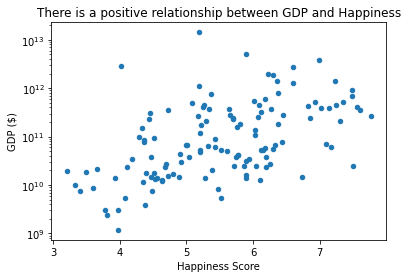

In [32]:
import matplotlib.pyplot as plt

GDP_HAPP = complete_df[['Country', 'Year', 'GDP ($)', 'Happiness Score']]
GDP_HAPP = GDP_HAPP.astype({'GDP ($)': 'int64'})
GDP_HAPP[GDP_HAPP['Year'] == 2019].plot.scatter(y='GDP ($)', x='Happiness Score', logy=True,
                                               title='There is a positive relationship between GDP and Happiness')

### 3b. Household Size

<AxesSubplot:title={'center':'There is no clear relationship between household size and happiness'}, xlabel='Happiness Score', ylabel='Average Household Size'>

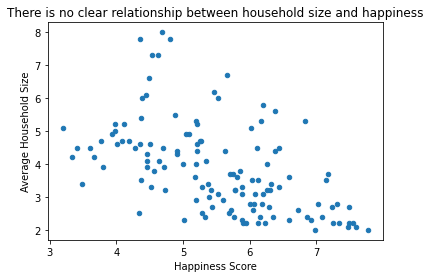

In [33]:
GDP_HAPP = complete_df[['Country', 'Year', 'Average Household Size', 'Happiness Score']]
GDP_HAPP[GDP_HAPP['Year'] == 2019].plot.scatter(y='Average Household Size', x='Happiness Score',
                                               title='There is no clear relationship between household size and happiness')

## <font color='light blue'>Part 4 - Load into Visualisation tool</font>

### Using Tableau
Click [here](https://public.tableau.com/app/profile/cj.de.guzman/viz/WorldHappinessDashboard_16478803702860/WorldHappiness) to view the dashboard analysing the happiness data based around wealth, quality of life and family structure